In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import uniform, randint

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## Feature
from sklearn.feature_extraction import DictVectorizer

## Model evaluators
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay

## Save the model
import pickle

# Time
import time

## Load Data

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df.shape # (rows, columns)

(1987, 10)

## Data Exploration 

In [3]:
len(df)

1987

In [4]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Age,31,31,34,28,28
Employment Type,Government Sector,Private Sector/Self Employed,Private Sector/Self Employed,Private Sector/Self Employed,Private Sector/Self Employed
GraduateOrNot,Yes,Yes,Yes,Yes,Yes
AnnualIncome,400000,1250000,500000,700000,700000
FamilyMembers,6,7,4,3,8
ChronicDiseases,1,0,1,1,1
FrequentFlyer,No,No,No,No,Yes
EverTravelledAbroad,No,No,No,No,No
TravelInsurance,0,0,1,0,0


In [6]:
df['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
1982    1982
1983    1983
1984    1984
1985    1985
1986    1986
Name: Unnamed: 0, Length: 1987, dtype: int64

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.columns

Index(['age', 'employment_type', 'graduateornot', 'annualincome',
       'familymembers', 'chronicdiseases', 'frequentflyer',
       'evertravelledabroad', 'travelinsurance'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  1987 non-null   int64 
 1   employment_type      1987 non-null   object
 2   graduateornot        1987 non-null   object
 3   annualincome         1987 non-null   int64 
 4   familymembers        1987 non-null   int64 
 5   chronicdiseases      1987 non-null   int64 
 6   frequentflyer        1987 non-null   object
 7   evertravelledabroad  1987 non-null   object
 8   travelinsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [11]:
df.describe()

,age,annualincome,familymembers,chronicdiseases,travelinsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


## Exploratory Data Analysis

In [12]:
# count class of target
df["travelinsurance"].value_counts()

0    1277
1     710
Name: travelinsurance, dtype: int64

In [13]:
# Normalized value counts
df["travelinsurance"].value_counts(normalize=True)

0    0.642677
1    0.357323
Name: travelinsurance, dtype: float64

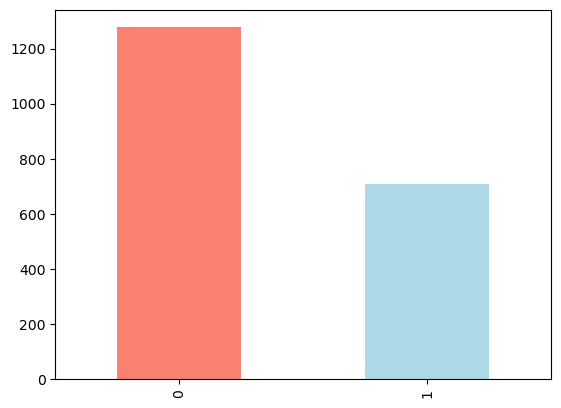

In [14]:
# Plot the value counts with a bar graph
df["travelinsurance"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

#### Visualization of distribution of data in each column of the dataset

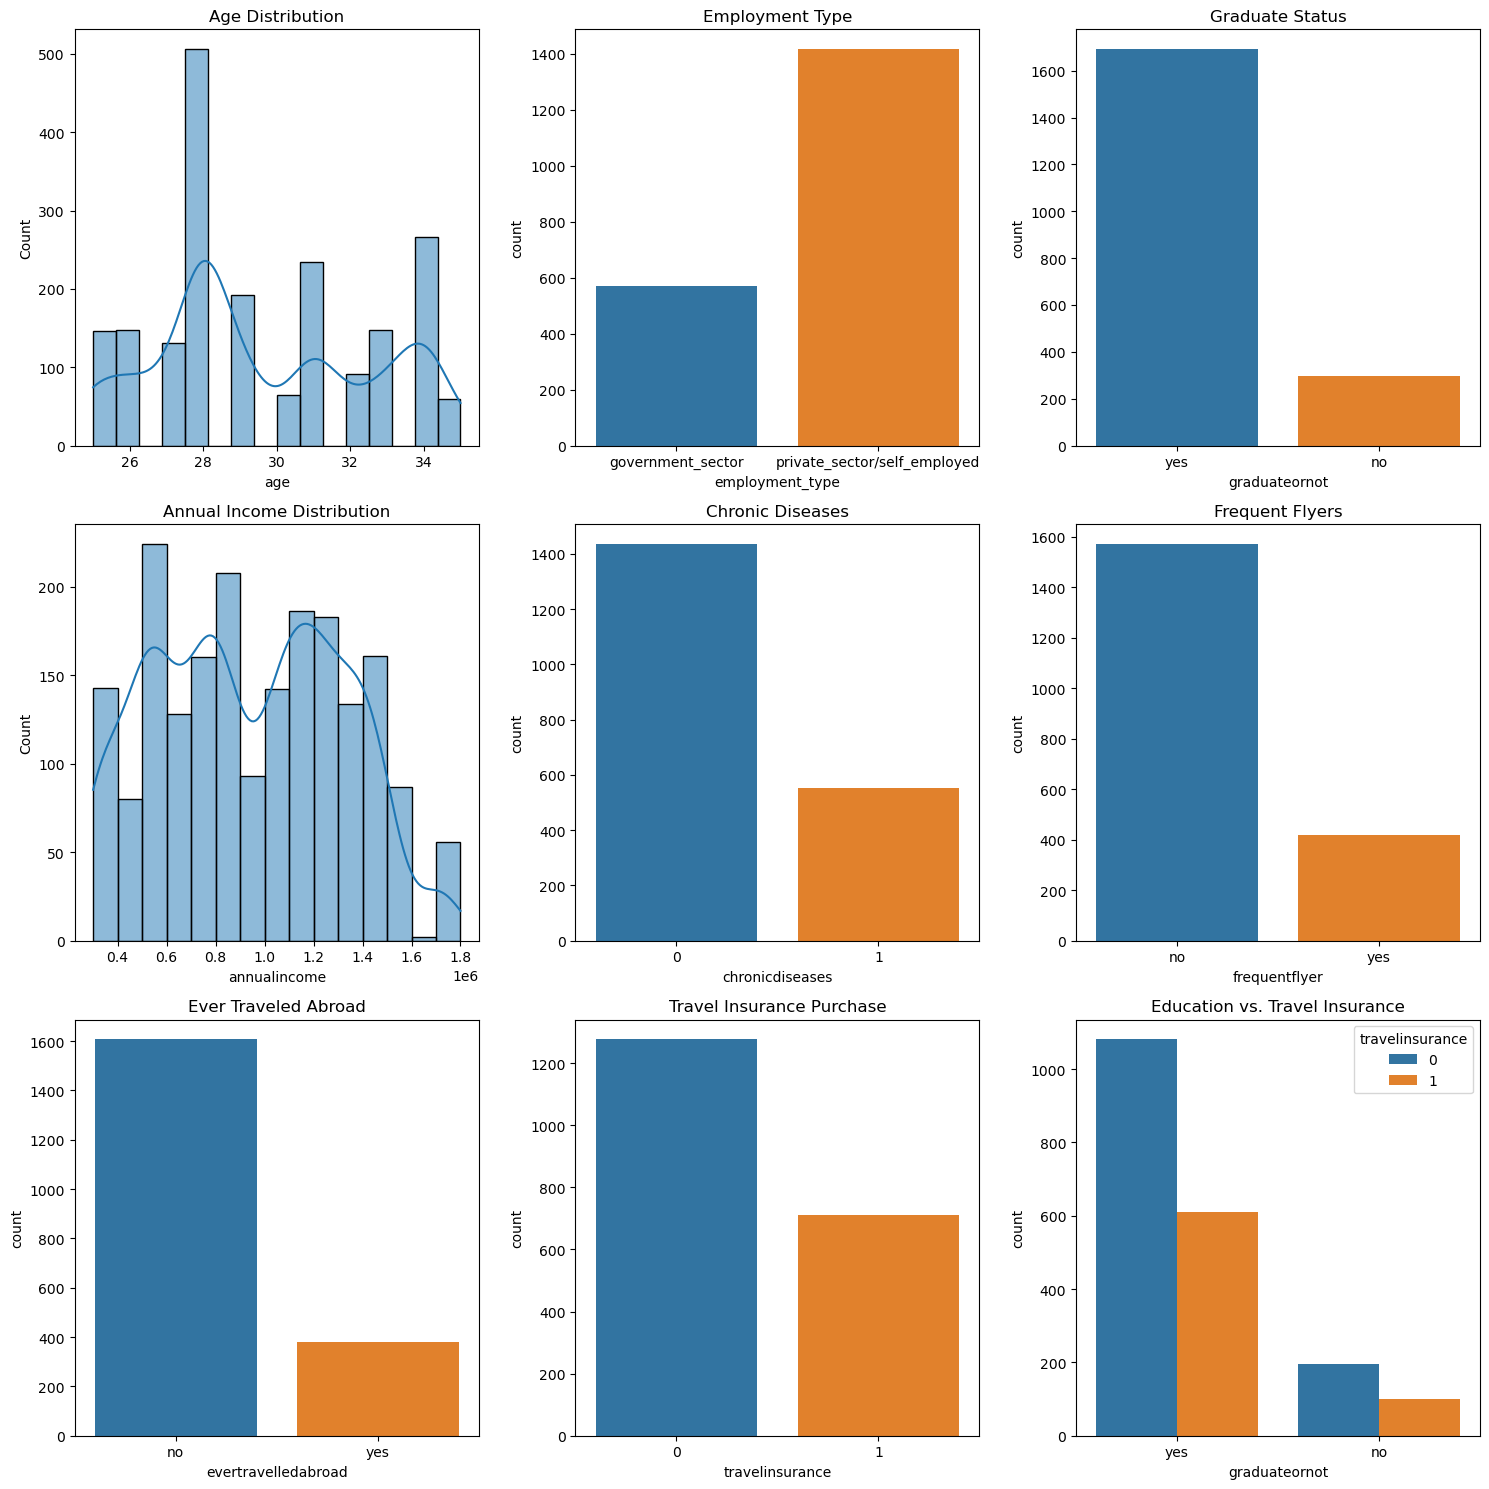

In [15]:
# Create subplots for visualizations
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# 1. Age Distribution
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. Employment Type
sns.countplot(data=df, x='employment_type', ax=axes[0, 1])
axes[0, 1].set_title('Employment Type')

# 3. Graduate Status
sns.countplot(data=df, x='graduateornot', ax=axes[0, 2])
axes[0, 2].set_title('Graduate Status')

# 4. Annual Income Distribution
sns.histplot(df['annualincome'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Annual Income Distribution')

# 5. Chronic Diseases
sns.countplot(data=df, x='chronicdiseases', ax=axes[1, 1])
axes[1, 1].set_title('Chronic Diseases')

# 6. Frequent Flyers
sns.countplot(data=df, x='frequentflyer', ax=axes[1, 2])
axes[1, 2].set_title('Frequent Flyers')

# 7. Travel Abroad
sns.countplot(data=df, x='evertravelledabroad', ax=axes[2, 0])
axes[2, 0].set_title('Ever Traveled Abroad')

# 8. Travel Insurance Purchase
sns.countplot(data=df, x='travelinsurance', ax=axes[2, 1])
axes[2, 1].set_title('Travel Insurance Purchase')

# 9. Relationship between Education and Insurance
sns.countplot(data=df, x='graduateornot', hue='travelinsurance', ax=axes[2, 2])
axes[2, 2].set_title('Education vs. Travel Insurance')

# Set layout and display
plt.tight_layout()
plt.show()


#### Relationship between feature variables and target variables

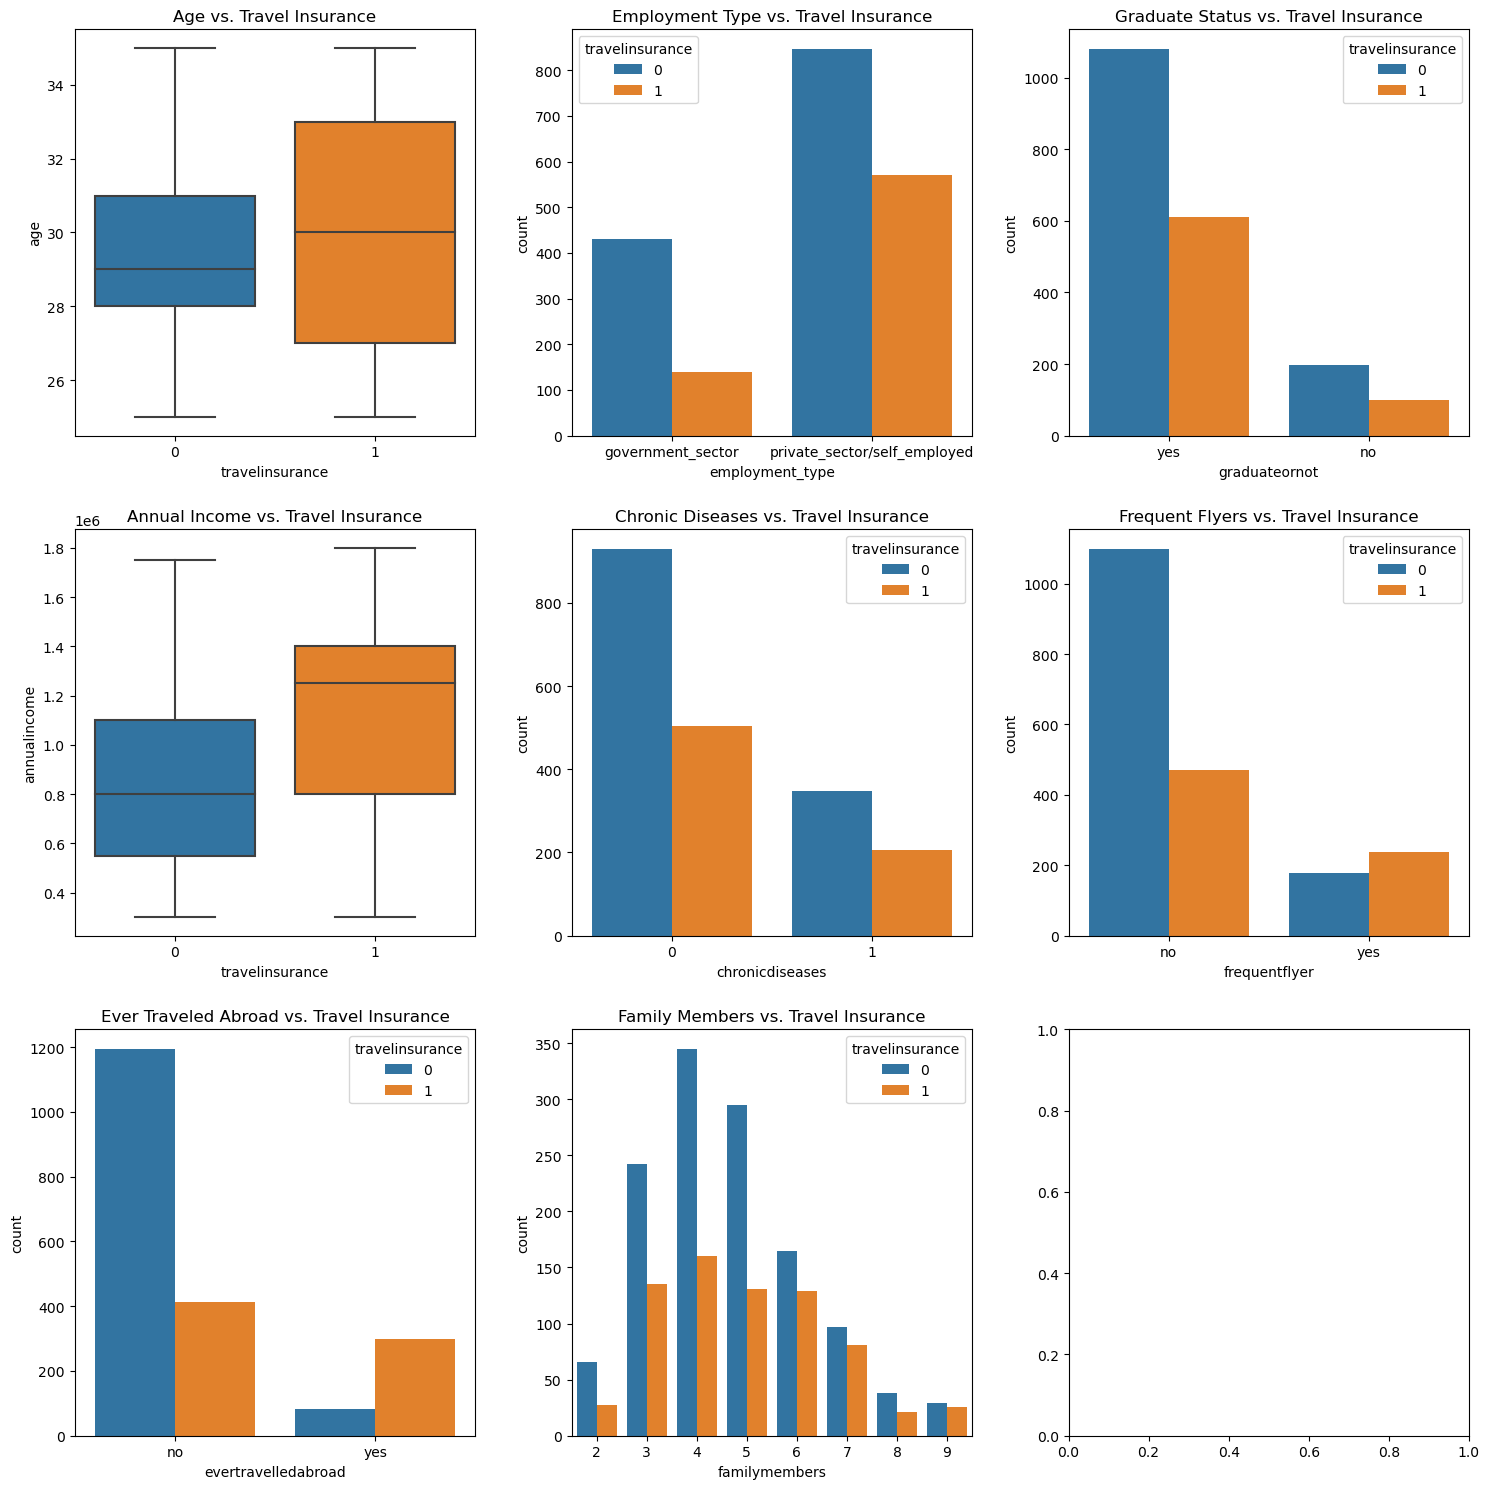

In [16]:
# Create subplots for visualizations
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Relationship with Age and Travel Insurance
sns.boxplot(data=df, x='travelinsurance', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Travel Insurance')

# Relationship with Employment Type and Travel Insurance
sns.countplot(data=df, x='employment_type', hue='travelinsurance', ax=axes[0, 1])
axes[0, 1].set_title('Employment Type vs. Travel Insurance')

# Relationship with Graduate Status and Travel Insurance
sns.countplot(data=df, x='graduateornot', hue='travelinsurance', ax=axes[0, 2])
axes[0, 2].set_title('Graduate Status vs. Travel Insurance')

# Relationship with Annual Income and Travel Insurance
sns.boxplot(data=df, x='travelinsurance', y='annualincome', ax=axes[1, 0])
axes[1, 0].set_title('Annual Income vs. Travel Insurance')

# Relationship with Chronic Diseases and Travel Insurance
sns.countplot(data=df, x='chronicdiseases', hue='travelinsurance', ax=axes[1, 1])
axes[1, 1].set_title('Chronic Diseases vs. Travel Insurance')

# Relationship with Frequent Flyers and Travel Insurance
sns.countplot(data=df, x='frequentflyer', hue='travelinsurance', ax=axes[1, 2])
axes[1, 2].set_title('Frequent Flyers vs. Travel Insurance')

# Relationship with Ever Traveled Abroad and Travel Insurance
sns.countplot(data=df, x='evertravelledabroad', hue='travelinsurance', ax=axes[2, 0])
axes[2, 0].set_title('Ever Traveled Abroad vs. Travel Insurance')

# Relationship with Family Members and Travel Insurance
sns.countplot(data=df, x='familymembers', hue='travelinsurance', ax=axes[2, 1])
axes[2, 1].set_title('Family Members vs. Travel Insurance')

# Set layout and display
plt.tight_layout()
plt.show()


#### Correlation between independent variables

In [17]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,age,annualincome,familymembers,chronicdiseases,travelinsurance
age,1.000000,-0.020101,0.027409,0.007359,0.061060
annualincome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
familymembers,0.027409,-0.015367,1.000000,0.028209,0.079909
chronicdiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
travelinsurance,0.061060,0.396763,0.079909,0.018190,1.000000


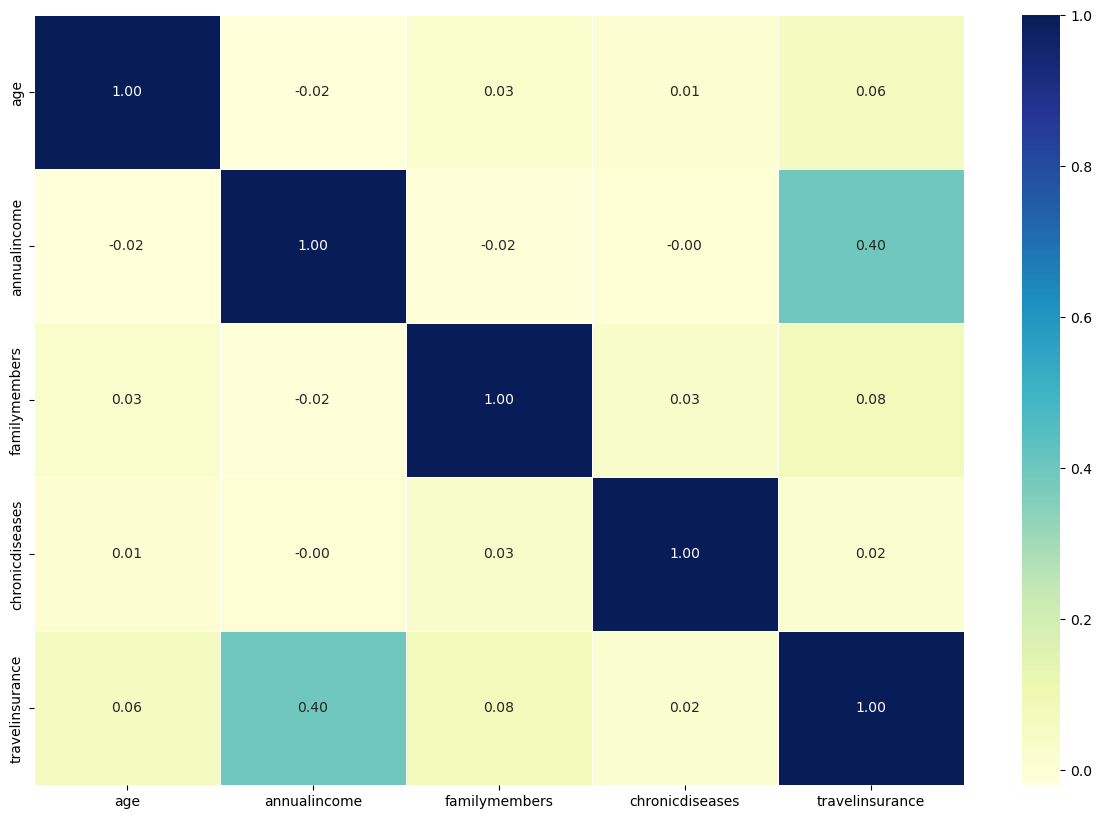

In [18]:
# plot
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## Prepare and split the dataset

In [19]:
#check for nulls
df.isna().sum()

age                    0
employment_type        0
graduateornot          0
annualincome           0
familymembers          0
chronicdiseases        0
frequentflyer          0
evertravelledabroad    0
travelinsurance        0
dtype: int64

In [20]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical 

['employment_type', 'graduateornot', 'frequentflyer', 'evertravelledabroad']

In [21]:
numerical = list(df[['age', 'annualincome', 'familymembers', 'chronicdiseases']])
numerical

['age', 'annualincome', 'familymembers', 'chronicdiseases']

#### Setting up the validation framework

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [23]:
len(df_train), len(df_val), len(df_test)

(1191, 398, 398)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.travelinsurance.values
y_val = df_val.travelinsurance.values
y_test = df_test.travelinsurance.values

del df_train['travelinsurance']
del df_val['travelinsurance']
del df_test['travelinsurance']

## Feature Importance

In [26]:
mutual_info_score(df_full_train.travelinsurance, df_full_train.employment_type)

0.012051921128907295

In [27]:
mutual_info_score(df_full_train.travelinsurance, df_full_train.graduateornot)

0.00039935644039687523

In [28]:
mutual_info_score(df_full_train.travelinsurance, df_full_train.frequentflyer)

0.02526516104645593

In [29]:
mutual_info_score(df_full_train.travelinsurance, df_full_train.evertravelledabroad)

0.08553636678568838

In [30]:
def mutual_info_insurance_score(series):
    return mutual_info_score(series, df_full_train.travelinsurance)

In [31]:
mi = df_full_train[categorical].apply(mutual_info_insurance_score)
mi.sort_values(ascending=False)

evertravelledabroad    0.085536
frequentflyer          0.025265
employment_type        0.012052
graduateornot          0.000399
dtype: float64

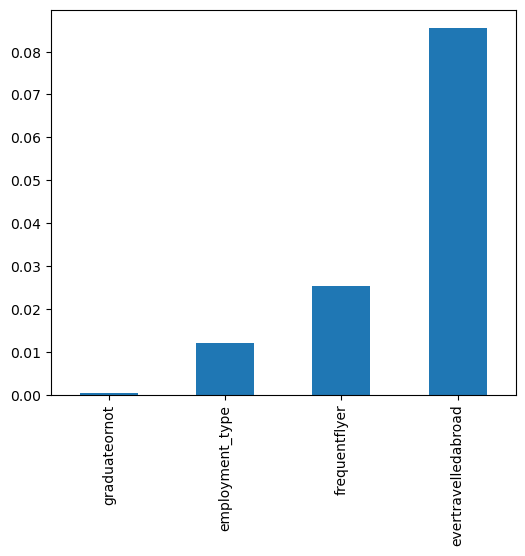

In [32]:
plt.figure(figsize = (6, 5))
mi.sort_values().plot(kind = 'bar');


In [33]:
num_corr = df_full_train[numerical].corrwith(df_full_train.travelinsurance).abs()
num_corr

age                0.052488
annualincome       0.396610
familymembers      0.082207
chronicdiseases    0.032062
dtype: float64

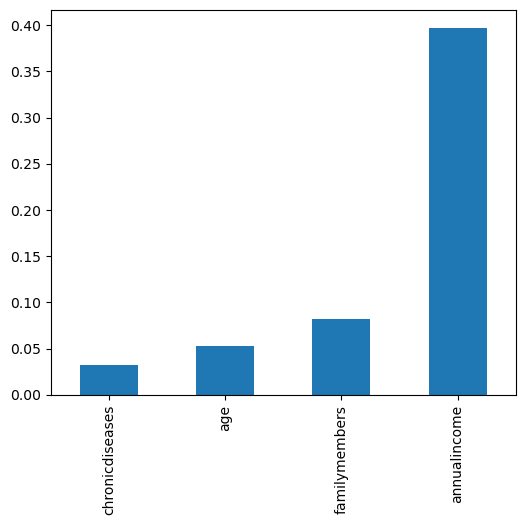

In [34]:
plt.figure(figsize = (6, 5))
num_corr.sort_values().plot(kind = 'bar');


#### Converting dictionaries of feature-value mappings into a matrix suitable for machine learning algorithm

In [35]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

Let's see our new variables.

In [36]:
dv.get_feature_names_out()

array(['age', 'annualincome', 'chronicdiseases',
       'employment_type=government_sector',
       'employment_type=private_sector/self_employed',
       'evertravelledabroad=no', 'evertravelledabroad=yes',
       'familymembers', 'frequentflyer=no', 'frequentflyer=yes',
       'graduateornot=no', 'graduateornot=yes'], dtype=object)

## Modeling

In [37]:
len(X_train), len(X_val)

(1191, 398)

In [38]:
y_train, len(y_train)

(array([1, 0, 0, ..., 1, 1, 0], dtype=int64), 1191)

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [39]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
         "XGBoost": xgb.XGBClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [40]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)
model_scores

{'KNN': 0.8040201005025126,
 'Logistic Regression': 0.6432160804020101,
 'Random Forest': 0.8090452261306532,
 'XGBoost': 0.8140703517587939}

Beautiful! Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

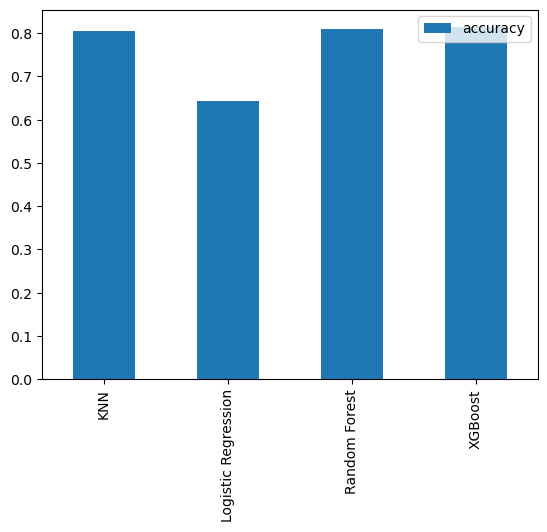

In [41]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Beautiful! We can't really see it from the graph but looking at the dictionary, the XGBoost model performs best.

## Hyperparameter tuning and cross-validation

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of `n_neighbors`.

In [42]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
val_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    val_scores.append(knn.score(X_val, y_val))
    
    

Let's look at KNN's train scores.

In [43]:
train_scores

[0.910159529806885,
 0.8614609571788413,
 0.8572628043660789,
 0.8404701931150294,
 0.8413098236775819,
 0.8320738874895046,
 0.8337531486146096,
 0.8261964735516373,
 0.8245172124265323,
 0.8211586901763224,
 0.8203190596137699,
 0.815281276238455,
 0.818639798488665,
 0.8194794290512175,
 0.8144416456759026,
 0.8110831234256927,
 0.8110831234256927,
 0.8077246011754828,
 0.8110831234256927,
 0.8026868178001679]

These are hard to understand, let's plot them.

Maximum KNN score on the Val data: 82.16%


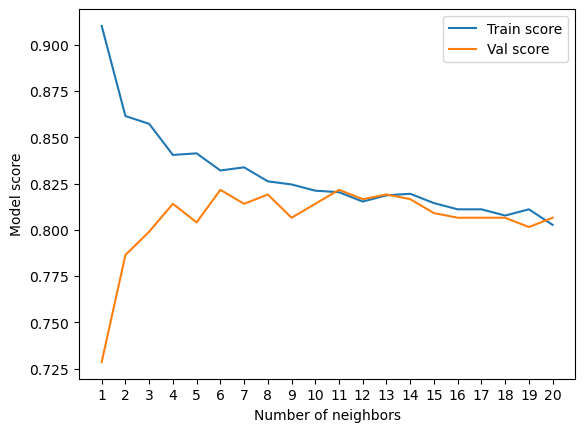

In [44]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, val_scores, label= "Val score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the Val data: {max(val_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best.

## Tuning models with with RandomizedSearchCV
Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out on XGBoost and RandomClassifier.

##### Hyperparameter tuning for XGBoost

In [45]:
# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'max_depth': randint(3, 10),  # Maximum depth of the tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.6, 0.4),  # Subsample ratio of columns
    'min_child_weight': randint(1, 10)  # Minimum sum of instance weight needed in a child
}

In [46]:
# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=50,
    cv=3, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021BD87304C0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021BD8730C70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021BD86F82B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021BD8730070>},
                   random_state=42, scoring='accuracy', verbose=1)

In [47]:
# Find the best parameters
random_search.best_params_

{'colsample_bytree': 0.842571623863836,
 'learning_rate': 0.012759115484988894,
 'max_depth': 8,
 'min_child_weight': 9,
 'n_estimators': 198,
 'subsample': 0.989465534702127}

In [48]:
random_search.best_score_

0.8261964735516373

In [49]:
# Evaluate the randomized search
random_search.score(X_test, y_test)

0.8391959798994975

##### Hyperparameter tuning for RandomForestClassifier

In [50]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [51]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [52]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [53]:
# Evaluate the randomized search on random forest model
rs_rf.score(X_test, y_test)

0.8442211055276382

## Tuning a model with GridSearchCV

##### GridSearchCV for XGBoost model

In [54]:
param_grid = {
'colsample_bytree': [0.842571623863836],
 'learning_rate': [0.012759115484988894],
 'max_depth': [8],
 'min_child_weight': [9],
 'n_estimators': [198],
 'subsample': [0.989465534702127]
}

In [55]:
grid_search = GridSearchCV(
    xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.842571623863836],
                         'learning_rate': [0.012759115484988894],
                         'max_depth': [8], 'min_child_weight': [9],
                         'n_estimators': [198],
                         'subsample': [0.989465534702127]},
             scoring='accuracy', verbose=1)

In [56]:
# Find the best parameters
grid_search.best_params_

{'colsample_bytree': 0.842571623863836,
 'learning_rate': 0.012759115484988894,
 'max_depth': 8,
 'min_child_weight': 9,
 'n_estimators': 198,
 'subsample': 0.989465534702127}

In [57]:
grid_search.score(X_test, y_test)

0.8391959798994975

##### GridSearchCV for RandomForestClassifier model

In [58]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [59]:
gs_grid = {
'n_estimators': [910],
 'min_samples_split': [18],
 'min_samples_leaf': [1],
 'max_depth': [10]}

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier()

# Create the GridSearchCV instance
gs = GridSearchCV(
    rf_model, param_grid=gs_grid,
    cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the GridSearchCV to your training data
gs.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [18], 'n_estimators': [910]},
             scoring='accuracy', verbose=1)

In [60]:
gs.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 910}

In [61]:
gs.score(X_test, y_test)

0.8467336683417085

From the results, I'll make use the GridSearchCV version of our `RandomForestClassifier` estimator, `gs` as well as the test data, `X_test` and `y_test`.

## Evaluating a classification model beyond accuracy  

* ROC curve and AUC score 
* Confusion matrix 
* Classification report
* Precision
* Recall
* F1-score

In [62]:
# Make predictions on test data
y_preds = gs.predict(X_test)

In [63]:
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

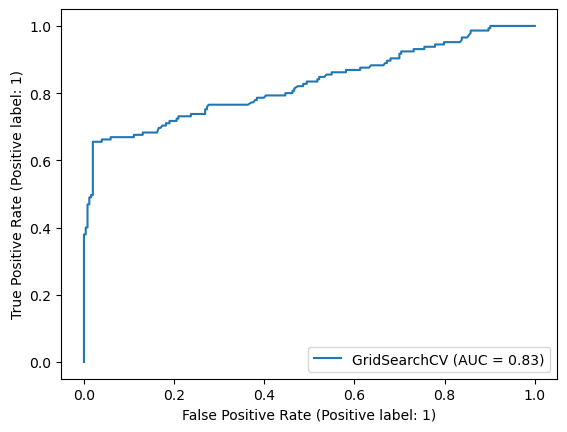

In [64]:
RocCurveDisplay.from_estimator(estimator=gs, 
                               X=X_test, 
                               y=y_test); 

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.8. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [65]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[248   5]
 [ 56  89]]


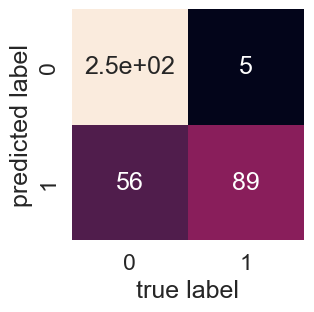

In [66]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report

A classification report will also give us information of the precision and recall of our model for each class.

In [67]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       253
           1       0.95      0.61      0.74       145

    accuracy                           0.85       398
   macro avg       0.88      0.80      0.82       398
weighted avg       0.86      0.85      0.84       398



### Cross-Validation

In [68]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 18, n_estimators = 910)

    model.fit(X_train, y_train)
    
    return dv, model


In [69]:
dv, model = train(df_train, y_train)

In [70]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [71]:
y_pred = predict(df_val, dv, model)

In [72]:
y_pred

array([0.23360092, 0.11520266, 0.63853257, 0.18939744, 0.2033891 ,
       0.94920853, 0.21133873, 0.2368088 , 0.4495817 , 0.25705296,
       0.21787727, 0.32373404, 0.09290398, 0.76821752, 0.28562888,
       0.61605559, 0.20110945, 0.26725973, 0.80053522, 0.4659782 ,
       0.17478968, 0.33336602, 0.21421785, 0.11381321, 0.70029212,
       0.21948133, 0.93208889, 0.95336705, 0.19429537, 0.0053476 ,
       0.04489795, 0.16125566, 0.38247617, 0.21930266, 0.13825863,
       0.30448778, 0.00543683, 0.21015637, 0.83015599, 0.88193051,
       0.16276842, 0.21942528, 0.21835876, 0.17224347, 0.31783667,
       0.3986256 , 0.37190144, 0.22423325, 0.27731905, 0.19423607,
       0.18773767, 0.17182011, 0.27799291, 0.56786536, 0.25705296,
       0.85971711, 0.07532662, 0.1907567 , 0.17316077, 0.1534197 ,
       0.23960821, 0.2426194 , 0.11373544, 0.89173791, 0.18121902,
       0.19278156, 0.13101835, 0.19870536, 0.29799105, 0.4277946 ,
       0.23777258, 0.15568522, 0.95958267, 0.22121946, 0.66045

## Save the model

In [73]:
output_file = f'insurance_model.bin'
output_file

'insurance_model.bin'

In [74]:
f_out = open(output_file, 'wb')
pickle.dump ((dv, model), f_out)
f_out.close()

In [75]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)